# Table of contents
* [Data preprocessing](#one)
* [Statistic about all dataset](#two)
* [Statistic about single models](#three)

In [1]:
import warnings; warnings.simplefilter('ignore')

#  Zmienic fory  --> List comp
#  Korelacje inne niz liniowa  https://www.freecodecamp.org/news/how-machines-make-predictions-finding-correlations-in-complex-data-dfd9f0d87889/
#  Usunac zip'a przy tworzeniu df'a

### Import libs

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline
#pd.options.display.float_format = '{:.0f}'.format


<a class="anchor" id="one"></a>

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
 <h1 style=font-size:40px><center> Data preprocessing </center></h1> 


### Load data

In [3]:
#Read raw scrapped data
data_raw = pd.read_csv("PL_Data-Otomoto.csv")
print(data_raw.head())

   IndexWew   Age EngineCap Fueltype       Marka  Milage  Model  Price
0       0.0     0       NaN      NaN         NaN       0    NaN      0
1       1.0     0       0.0      0.0       Marka       0  Model      0
2       2.0  2006    1598.0      1.0  alfa-romeo  135000    147  10500
3       3.0  2006    1600.0      1.0  alfa-romeo  186000    147   8900
4       4.0  2002    1910.0      2.0  alfa-romeo  224871    147   4000


### Delete invalid data created by scrapper

In [4]:
#Delete all string values
data = data_raw[data_raw.Age.str.isnumeric()]
#Delete 0 value 
data = data[data.Age != "0"]

print(data.head())

   IndexWew   Age EngineCap Fueltype       Marka  Milage Model  Price
2       2.0  2006    1598.0      1.0  alfa-romeo  135000   147  10500
3       3.0  2006    1600.0      1.0  alfa-romeo  186000   147   8900
4       4.0  2002    1910.0      2.0  alfa-romeo  224871   147   4000
5       5.0  2006    1598.0      1.0  alfa-romeo  154671   147  11200
6       6.0  2003    1970.0      1.0  alfa-romeo  241450   147   2700


### Usefull preprocessing functions

In [22]:
def DropNames(DataFrame):
    ''' Drop non-numeric data
    
    DataFrame = Dataframe to drop names
    '''
    #Drop non-numeric data and convert strings numbers to float numbers
    DataFrame.drop(columns=['Model','Marka','IndexWew'],inplace=True)
    DataFrame = DataFrame.astype(float)
    return DataFrame

def DropOutlier(dataset_out,mileage=4,age=4,price=4):
    ''' Drop outlier values
    
    dataset_out = dataset to drop values
    '''
    clear = dataset_out.Milage[((dataset_out.Milage - dataset_out.Milage.mean()) / dataset_out.Milage.std()).abs() > mileage]
    #Search for outlier indexes
    clear = dataset_out.Milage[((dataset_out.Milage - dataset_out.Milage.mean()) / dataset_out.Milage.std()).abs() > mileage]
    clear = clear.append(dataset_out.Age[((dataset_out.Age - dataset_out.Age.mean()) / dataset_out.Age.std()).abs() > age])
    clear = clear.append(dataset_out.Price[((dataset_out.Price - dataset_out.Price.mean()) / dataset_out.Price.std()).abs() > price])
    test1 = clear.index.get_values()
    #Delete duplicated indexes
    test = []
    for i in test1:
       if i not in test:
          test.append(i)

    #Delete row with given indexes
    for i in range(0,len(test)):
        dataset_out = dataset_out.drop(test[i],axis=0)
        
    return dataset_out

<a class="anchor" id="two"></a>

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
 <h1 style=font-size:40px><center> Statistic for whole dataset </center></h1>  

### Create correlation table for one model

In [6]:
def Correlation(ModelDF,scatter = False, printing = False):
    ''' Create corr table
    Scatter - print scatter_matrix or not
    printing - print corr table or not
    
    '''
    ModelDF = DropNames(ModelDF)
    ModelDF = DropOutlier(ModelDF)
    
    CorrMatrix = ModelDF.corr(method='pearson')
    
    #Print correlations
    if printing == True:
        print("\n\nPearson corr")
        print(CorrMatrix)

    #Print scatter matrix of corr
    if scatter == True:
        scatter_matrix(ModelDF,alpha=0.2, figsize=(6, 6), diagonal='kde')
    
    return CorrMatrix

### Create corr list for all models

In [8]:
def CorrModelsList(Compare1='FuelType',Compare2='Milage',MinCount=0):
    ''' Create corr list bettwen 2 values 
    
    Compare1 = Values list 1
    Compare2 = Values list 2
    MinCount = Min. count of car auctions that will be in checked for corr
    '''
    CarModels = data.Model.unique()
    
    #Create list with specific model count 
    ModelCount = []
    for model in CarModels:
        count = data['Model'].tolist().count(model)
        ModelCount.append(count)
    
    #Create list with Corr value
    CorrList = []
    for model in CarModels:
        matrix = Correlation(data[data.Model == "{}".format(model)])
        CorrList.append(matrix.get_value(index='{}'.format(Compare1),col='{}'.format(Compare2)))
            
    CorrDataframe = pd.DataFrame(list(zip(CarModels,ModelCount, CorrList)), columns =['Model', 'ModelCount','CorrValue']) 
    
    CorrDataframe = CorrDataframe[CorrDataframe.ModelCount>MinCount]
    
    return CorrDataframe

### Cars with highest drop within age

In [9]:
PriceAge = CorrModelsList('Price','Age',500)
print(PriceAge.sort_values(by=['CorrValue'],ascending=False))

            Model  ModelCount  CorrValue
157          jazz         640   0.932537
281       corolla        1404   0.925816
275       avensis        2223   0.912295
286          rav4        1288   0.903867
176        tucson        1135   0.903805
24             q7         791   0.897969
229         corsa        2920   0.892987
154          cr-v        1011   0.892263
235        meriva        1717   0.890535
189      sportage        1433   0.888982
197             6        1722   0.887784
318        touran        1628   0.885802
153         civic        1925   0.884973
317       touareg         602   0.884558
164           i20         718   0.883678
166           i30        1682   0.882120
316        tiguan        1455   0.881234
227         astra        6884   0.881062
54             x1         664   0.880206
115         panda         633   0.878592
194             3        1090   0.877014
151        accord         836   0.876880
263         fabia        2712   0.876749
126         c-ma

### Cars with highest price drop within given mileage

In [10]:
PriceMilage = CorrModelsList('Price','Milage',500)
print(PriceMilage.sort_values(by=['CorrValue'],ascending=True))

                Model  ModelCount  CorrValue
281           corolla        1404  -0.889741
176            tucson        1135  -0.866956
157              jazz         640  -0.866081
271            superb        1580  -0.861076
24                 q7         791  -0.849839
154              cr-v        1011  -0.848670
293             caddy        1008  -0.847796
318            touran        1628  -0.844785
267           octavia        4169  -0.843962
153             civic        1925  -0.842329
23                 q5        1163  -0.836115
317           touareg         602  -0.835122
319       transporter         557  -0.830356
263             fabia        2712  -0.828306
286              rav4        1288  -0.826699
275           avensis        2223  -0.821212
56                 x3        1324  -0.818873
316            tiguan        1455  -0.817698
268             rapid         863  -0.817014
302              golf        6298  -0.816846
227             astra        6884  -0.814936
189       

### Create trend line

In [11]:
def TrendLine(x,y,xlbl="xlbl",ylbl="ylbl",tile="car",plot=True):
    model = LinearRegression()
    model.fit(x,y)
    model.predict([[100]])
    
    model = linear_model.LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    
    if plot == True:
        plt.rcParams['figure.figsize'] = [15, 10]
        plt.scatter(x,y,s=2)
        plt.plot(x,y_pred,'r')
        plt.legend(['TrendLine', 'CarAuction'])
        plt.xlabel('{}'.format(xlbl))
        plt.ylabel('{}'.format(ylbl))
        plt.title('{}'.format(tile))
        plt.show()
    
    return model.coef_

### Create list with Coeff regression values to chceck Milage-Age dependecies

In [12]:
def CoeffModelList(CarModels,MinCount=0):
        

    CoeffList = []
    for model in CarModels:
        model = data[data.Model == "{}".format(model)]
        model = DropNames(model)
        model = DropOutlier(model, mileage=2)   
        y = pd.DataFrame(model['Age'].values.reshape(-1,1),dtype=np.int64)
        x = pd.DataFrame(model['Milage'].values.reshape(-1,1),dtype=np.int64) 

        coeff = TrendLine(x,y,plot=False)
        CoeffList.append(coeff[0,0])

    ModelCount = []
    for model in CarModels:
        count = data['Model'].tolist().count(model)
        ModelCount.append(count)

    CoeffAgeMilage = pd.DataFrame(list(zip(CarModels,ModelCount, CoeffList)), columns =['Model', 'ModelCount','CoeffValue'])
    CoeffAgeMilage = CoeffAgeMilage[CoeffAgeMilage.ModelCount>MinCount]
    return CoeffAgeMilage.sort_values(by=['CoeffValue'])


In [13]:
CarModels = data.Model.unique()
print(CoeffModelList(CarModels,500))

                Model  ModelCount  CoeffValue
157              jazz         640   -0.000066
103               500         619   -0.000066
244              clio        2263   -0.000063
176            tucson        1135   -0.000062
153             civic        1925   -0.000062
281           corolla        1404   -0.000062
83                 c3        1272   -0.000062
229             corsa        2920   -0.000060
286              rav4        1288   -0.000056
302              golf        6298   -0.000056
154              cr-v        1011   -0.000054
254            megane        3192   -0.000053
52            seria-7         904   -0.000052
194                 3        1090   -0.000052
310              polo        2210   -0.000052
132            fiesta        2225   -0.000052
263             fabia        2712   -0.000052
227             astra        6884   -0.000050
13                 a3        3055   -0.000050
189          sportage        1433   -0.000048
197                 6        1722 

<a class="anchor" id="three"></a>

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
 <h1 style=font-size:40px><center> Statistic for single models </center></h1> 



 <h1 style=font-size:35px><center> Fiat 500 </center></h1> 


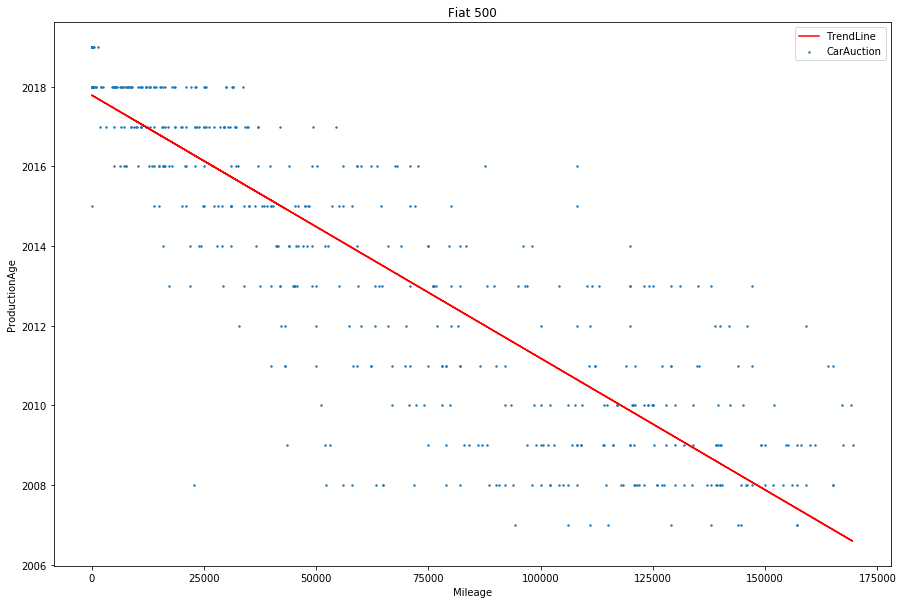

array([[-6.60964823e-05]])

In [14]:
car = data[data.Model == "500"]
car = DropNames(car)
car = DropOutlier(car,mileage=2)  
 
y = pd.DataFrame(car['Age'].values.reshape(-1,1),dtype=np.int64)
x = pd.DataFrame(car['Milage'].values.reshape(-1,1),dtype=np.int64) 
TrendLine(x,y,"Mileage","ProductionAge","Fiat 500")

### Let's check Milage mean per year for some cars

In [15]:
def MeanMileageList(car):
    AgeList = car.Age.unique()

    MeanMileage = []
    CountList = []
    YearMeanList = []
    for age in AgeList:
        
        count = car[car.Age == age].shape[0]
        CountList.append(count)
        
        mean = car[car.Age == age].Milage.mean()
        MeanMileage.append(mean)

        YearMean = mean/(2020-age)
        YearMeanList.append(YearMean)

    MeanMileageList =  [round(x) for x in MeanMileage] 
    YearMeanList = [round(x) for x in YearMeanList] 
    
    AgeMilageList = pd.DataFrame(list(zip(AgeList,MeanMileageList,YearMeanList,CountList)), columns =['Age', 'MileageMean','YearMean','Count']) 

    return AgeMilageList.sort_values(by=['Age'])




 <h1 style=font-size:35px><center> Opel Vectra </center></h1> 



In [16]:
car = data[data.Model == "vectra"]
car = DropNames(car)
car = DropOutlier(car,mileage=2)  

print(MeanMileageList(car))

       Age  MileageMean  YearMean  Count
14  1994.0       160000    6154.0      2
15  1995.0       166700    6668.0      1
11  1996.0       268452   11186.0     17
13  1997.0       243367   10581.0     17
9   1998.0       247825   11265.0     22
2   1999.0       244217   11629.0     32
8   2000.0       231320   11566.0     38
10  2001.0       205195   10800.0     30
5   2002.0       214513   11917.0    115
3   2003.0       212976   12528.0    179
0   2004.0       234755   14672.0    199
7   2005.0       223307   14887.0    164
4   2006.0       224785   16056.0    251
1   2007.0       220522   16963.0    202
6   2008.0       218046   18170.0    161
12  2009.0       193785   17617.0     17


#### Lowest Coeff

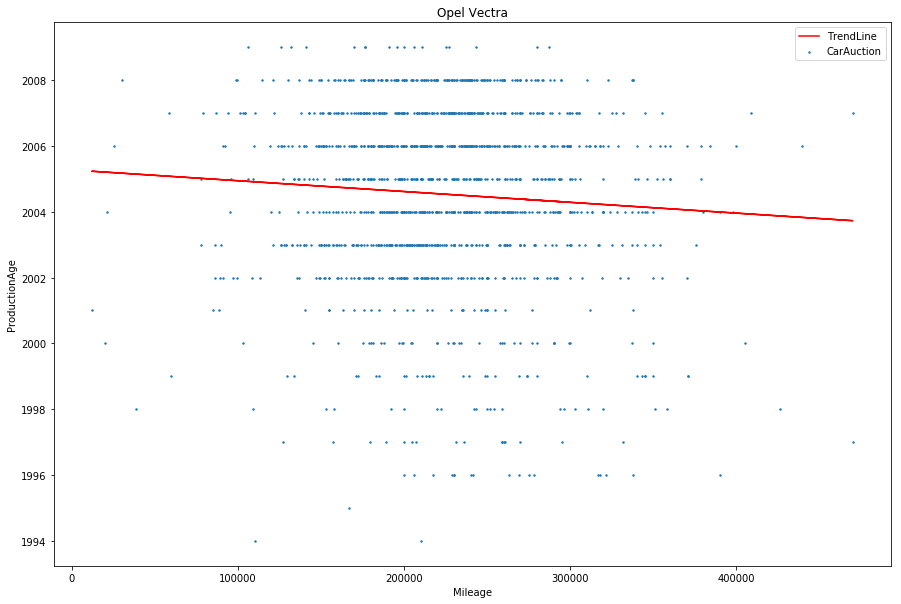

array([[-3.27807577e-06]])

In [17]:
car = data[data.Model == "vectra"]
car = DropNames(car)
car = DropOutlier(car,mileage=2)  
 
y = pd.DataFrame(car['Age'].values.reshape(-1,1),dtype=np.int64)
x = pd.DataFrame(car['Milage'].values.reshape(-1,1),dtype=np.int64) 
TrendLine(x,y,"Mileage","ProductionAge","Opel Vectra")


 <h1 style=font-size:35px><center> Volkswagen Golf </center></h1> 


In [18]:
car = data[data.Model == "golf"]
car = DropNames(car)
car = DropOutlier(car,mileage=2)  

print(MeanMileageList(car))

       Age  MileageMean  YearMean  Count
34  1983.0       363000    9811.0      1
15  1985.0       178333    5095.0      6
33  1986.0        72000    2118.0      2
35  1987.0       179000    5424.0      3
32  1988.0       168700    5272.0      3
31  1989.0       174899    5642.0      9
29  1990.0       206791    6893.0     15
27  1991.0       230346    7943.0     26
30  1992.0       222543    7948.0      8
14  1993.0       215990    8000.0      9
26  1994.0       228656    8794.0     11
28  1995.0       202867    8115.0     22
24  1996.0       210763    8782.0     19
25  1997.0       205906    8952.0     27
23  1998.0       234765   10671.0    153
13  1999.0       230305   10967.0    192
22  2000.0       229331   11467.0    218
3   2001.0       223472   11762.0    190
7   2002.0       229048   12725.0    185
18  2003.0       221973   13057.0    195
16  2004.0       206881   12930.0    327
12  2005.0       207309   13821.0    260
21  2006.0       206009   14715.0    213
10  2007.0      

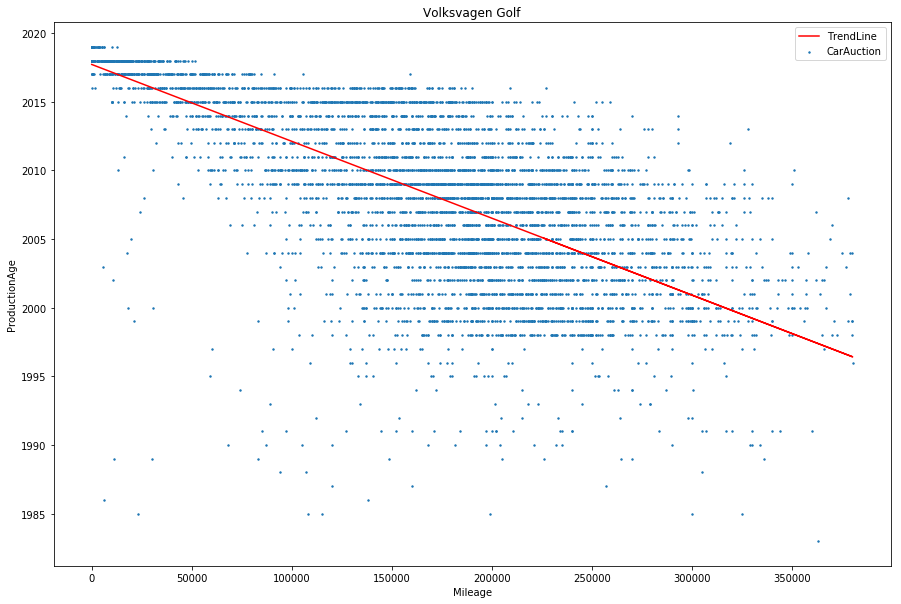

array([[-5.59865467e-05]])

In [19]:
car = data[data.Model == "golf"]
car = DropNames(car)
car = DropOutlier(car,mileage=2)  
 
y = pd.DataFrame(car['Age'].values.reshape(-1,1),dtype=np.int64)
x = pd.DataFrame(car['Milage'].values.reshape(-1,1),dtype=np.int64) 
TrendLine(x,y,"Mileage","ProductionAge","Volksvagen Golf")

### Create corr table for volksvagen golf

,Age,EngineCap,Fueltype,Milage,Price
Age,1.000000,-0.233448,0.052079,-0.764631,0.821703
EngineCap,-0.233448,1.000000,0.516147,0.362633,-0.150100
Fueltype,0.052079,0.516147,1.000000,0.268392,-0.130835
Milage,-0.764631,0.362633,0.268392,1.000000,-0.816846
Price,0.821703,-0.150100,-0.130835,-0.816846,1.000000


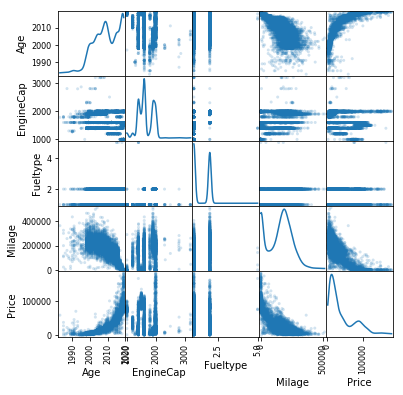

In [7]:
golf = data[data.Model == "golf"]
Correlation(golf,True,False)

In [20]:
car = data[data.Model == "passat"]
car = DropNames(car)
car = DropOutlier(car,mileage=2)  

print(MeanMileageList(car))

       Age  MileageMean  YearMean  Count
31  1985.0        54800    1566.0      1
32  1986.0       209462    6161.0      1
27  1987.0       227000    6879.0      2
28  1988.0       147282    4603.0      2
25  1990.0       262760    8759.0      6
30  1991.0       241000    8310.0      3
22  1992.0       263530    9412.0      9
33  1993.0       271444   10054.0      2
23  1994.0       273894   10534.0      9
29  1995.0       252333   10093.0      6
24  1996.0       262284   10928.0     18
18  1997.0       271665   11812.0     50
26  1998.0       258929   11769.0     89
19  1999.0       266555   12693.0    102
21  2000.0       260712   13036.0     87
13  2001.0       258873   13625.0    248
20  2002.0       254791   14155.0    202
17  2003.0       253461   14909.0    218
12  2004.0       250180   15636.0    190
4   2005.0       252395   16826.0    272
7   2006.0       244077   17434.0    382
9   2007.0       244691   18822.0    339
11  2008.0       235106   19592.0    265
16  2009.0      


 <h1 style=font-size:35px><center> Volkswagen Passat </center></h1> 


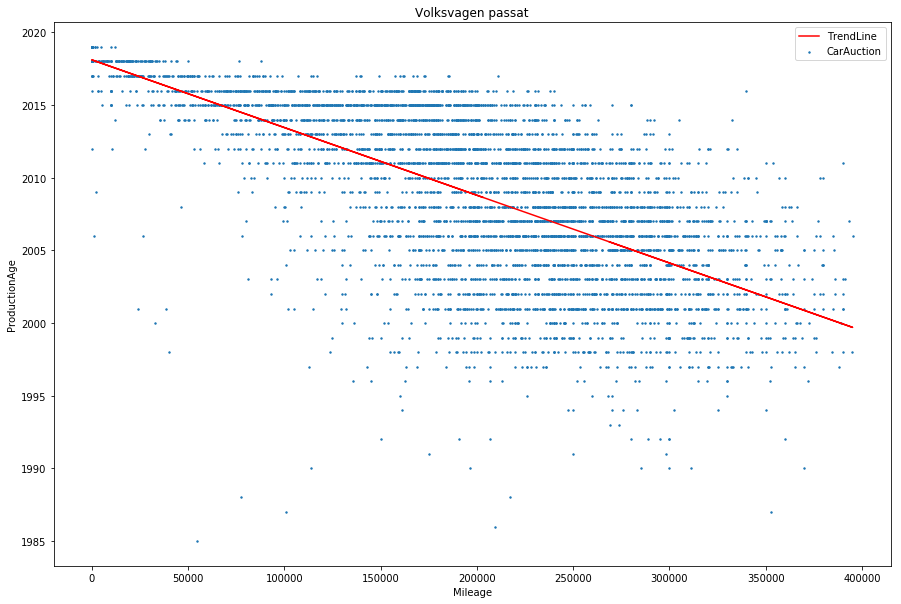

array([[-4.65935514e-05]])

In [21]:
car = data[data.Model == "passat"]
car = DropNames(car)
car = DropOutlier(car,mileage=2)  
 
y = pd.DataFrame(car['Age'].values.reshape(-1,1),dtype=np.int64)
x = pd.DataFrame(car['Milage'].values.reshape(-1,1),dtype=np.int64) 
TrendLine(x,y,"Mileage","ProductionAge","Volksvagen passat")